In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('clean_data_final.csv')
df.head()

,type,E_Extroversion,S_Sensing,T_Thinking,J_Judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,em,colons,emojis,word_count,unique_words,post_length_var,upper,link_count,ellipses,img_count
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.999800,0.418667,0.136150,...,0.22,0.32,0.08,30.98,14.92,78.414931,1.46,0.04,0.62,0.00
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.999950,0.600000,0.134585,...,0.36,0.14,0.00,28.58,12.72,160.744400,1.62,0.02,0.04,0.00
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...,0.995499,0.353333,0.297340,...,0.10,0.50,0.20,22.28,11.76,176.249600,1.30,0.06,0.04,0.04
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...,0.999700,0.437333,0.262911,...,0.00,0.00,0.00,34.36,15.38,83.520000,2.10,0.02,0.18,0.00
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...,0.999700,0.424000,0.172144,...,0.48,0.14,0.00,23.90,12.66,152.750400,1.70,0.50,0.00,0.04


In [3]:
df.shape

(8344, 126)

In [4]:
#เช็คrowว่าง
threshold = 50 

df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) >= threshold]

df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) >= threshold]]

,type,E_Extroversion,S_Sensing,T_Thinking,J_Judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,em,colons,emojis,word_count,unique_words,post_length_var,upper,link_count,ellipses,img_count
1860,INTJ,0,0,1,1,"'Her behavior already seems shady, and he seem...",behavior already seems shady seems encouragi...,0.99965,0.420000,0.259781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3186,INFJ,0,0,0,1,'inregardstomyself Oh not at all. I was thinki...,inregardstomyself thinking thing actually ...,0.99985,0.464000,0.172144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3486,INFP,0,0,0,0,"'Follow your intuition, no matter how crazy it...",follow intuition matter crazy barely taken...,0.99895,0.322667,0.222222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna(how="any", axis=0)

In [6]:
df.isnull().sum()

type               0
E_Extroversion     0
S_Sensing          0
T_Thinking         0
J_Judging          0
                  ..
post_length_var    0
upper              0
link_count         0
ellipses           0
img_count          0
Length: 126, dtype: int64

In [7]:
df.columns

Index(['type', 'E_Extroversion', 'S_Sensing', 'T_Thinking', 'J_Judging',
       'posts', 'clean_posts', 'compound_sentiment', 'pos_sentiment',
       'neg_sentiment',
       ...
       'em', 'colons', 'emojis', 'word_count', 'unique_words',
       'post_length_var', 'upper', 'link_count', 'ellipses', 'img_count'],
      dtype='object', length=126)

In [8]:
#เซ็ต x y
X = df[
    [
        "compound_sentiment",
        'pos_sentiment', 
        'neg_sentiment', 
        'neu_sentiment',
        "ADJ_avg",
        "ADP_avg",
        "ADV_avg",
        "CONJ_avg",
        "DET_avg",
        "NOUN_avg",
        "NUM_avg",
        "PRT_avg",
        "PRON_avg",
        "VERB_avg",
        "qm",
        "em",
        "colons",
        "emojis",
        "word_count",
        "unique_words",
        "upper",
        "link_count",
        "ellipses",
        "img_count",
    ]
]

Y = df.iloc[:, 0]

print(X.shape)
print(Y.shape)


(8341, 24)
(8341,)


In [9]:
X.head()

,compound_sentiment,pos_sentiment,neg_sentiment,neu_sentiment,ADJ_avg,ADP_avg,ADV_avg,CONJ_avg,DET_avg,NOUN_avg,...,qm,em,colons,emojis,word_count,unique_words,upper,link_count,ellipses,img_count
0,0.999800,0.418667,0.136150,0.652505,3.0,1.0,4.0,5.0,3.0,6.0,...,0.08,0.22,0.32,0.08,30.98,14.92,1.46,0.04,0.62,0.00
1,0.999950,0.600000,0.134585,0.506536,2.0,1.0,3.0,5.0,2.0,5.0,...,0.12,0.36,0.14,0.00,28.58,12.72,1.62,0.02,0.04,0.00
2,0.995499,0.353333,0.297340,0.594771,1.0,1.0,2.0,3.0,2.0,5.0,...,0.32,0.10,0.50,0.20,22.28,11.76,1.30,0.06,0.04,0.04
3,0.999700,0.437333,0.262911,0.549020,2.5,0.0,3.0,4.0,2.5,6.0,...,0.04,0.00,0.00,0.00,34.36,15.38,2.10,0.02,0.18,0.00
4,0.999700,0.424000,0.172144,0.623094,2.0,0.0,2.0,4.0,2.0,6.0,...,0.64,0.48,0.14,0.00,23.90,12.66,1.70,0.50,0.00,0.04


In [10]:
Y.head()

0    INFJ
1    INFJ
2    INFJ
3    ENFJ
4    INTP
Name: type, dtype: object

In [11]:
#model

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X) 
X = sc.transform(X)
X

array([[ 0.18593255,  0.51071498, -1.09219092, ..., -0.23815333,
         4.16292553, -0.39080447],
       [ 0.18698271,  2.9717308 , -1.11798101, ..., -0.40867757,
        -0.2856879 , -0.39080447],
       [ 0.15582781, -0.37597455,  1.56418895, ..., -0.06762908,
        -0.2856879 ,  0.34410706],
       ...,
       [ 0.18138183, -1.0093242 , -0.37006824, ..., -0.40867757,
         1.09491627, -0.39080447],
       [ 0.18488238, -0.28549602, -1.40167208, ...,  2.49023455,
        -0.59248883,  5.85594351],
       [ 0.17788128, -0.9912285 , -0.034797  , ..., -0.57920181,
         0.48131441, -0.39080447]])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

knn.fit(X, Y)

y_pred = knn.predict(X)

ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)
print('Training Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(Y, y_pred))

Training Accuracy:  0.4174559405347081
Training Classification Error:  0.582544059465292
Confusion matrix:
[[ 79  14   0   8   0   0   0   0  30  33   4  10   0   1   0   3]
 [ 28 359   3   8   0   0   0   1  69 103  30  33   1   2   3   3]
 [  8  27  66   5   0   0   0   0  19  39  26  31   0   2   1   1]
 [ 17  61  18 282   0   0   0   0  59  83  56  74   2   0   4   8]
 [  5   1   2   4   6   0   0   0   8   8   1   2   0   0   0   0]
 [  2   9   1   6   1   4   0   0   7   6   5   4   0   1   0   0]
 [  1   6   2   4   0   1   7   0   3   4   2   7   0   0   0   0]
 [  4  14   1  12   0   1   0  12  12  14   7   8   0   0   0   1]
 [ 27 133  35 100   1   4   4   6 703 186  80 107   2   5   4   5]
 [ 45 142  35 127   0   6   2   9 256 911  76 111   3   6   4  14]
 [ 17  69  34  97   4   3   2   9 133 138 404 136   2   2   3   8]
 [ 21  73  29 115   3   1   1   6 134 160 158 563   2   2   1   5]
 [ 12  21   6   8   0   4   2   3  32  38   7  11   9   0   0   1]
 [ 10  29  10  25   0 

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)#, random_state = 0)

# Print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (5838, 24)
y_train shape:  (5838,)
x_test shape:  (2503, 24)
y_test shape:  (2503,)


In [14]:
y_train.value_counts()

INFP    1191
INFJ     982
INTP     901
INTJ     748
ENTP     463
ENFP     450
ISTP     232
ISFP     176
ENTJ     159
ISTJ     141
ENFJ     137
ISFJ     114
ESTP      60
ESFP      36
ESFJ      28
ESTJ      20
Name: type, dtype: int64

In [15]:
y_test.value_counts()

INFP    556
INFJ    420
INTP    373
INTJ    313
ENTP    201
ENFP    193
ISTP     94
ISFP     84
ENTJ     66
ISTJ     56
ENFJ     45
ISFJ     40
ESTP     26
ESTJ     17
ESFP     10
ESFJ      9
Name: type, dtype: int64

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 5
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', ac)
print('Testing Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Testing Accuracy:  0.1673991210547343
Testing Classification Error:  0.8326008789452657
Confusion matrix:
[[  3  11   0   4   0   0   0   0  12   7   1   5   0   0   1   1]
 [ 12  33   4  14   3   0   0   1  34  55  14  16   2   2   0   3]
 [  1  10   3   8   0   0   0   0  10  12  11  11   0   0   0   0]
 [  6  22   9  19   0   1   0   0  40  38  24  38   0   1   1   2]
 [  0   1   0   0   0   0   0   0   4   1   1   1   1   0   0   0]
 [  1   3   0   0   0   0   0   0   2   2   1   1   0   0   0   0]
 [  0   2   1   1   0   1   0   0   2   6   2   2   0   0   0   0]
 [  0   4   1   2   0   1   0   0   7   2   6   3   0   0   0   0]
 [ 11  43  18  32   0   3   3   2 107 116  25  50   1   4   1   4]
 [ 19  65  20  62   1   1   1   1 125 143  45  62   1   2   0   8]
 [  5  28  15  39   1   1   0   3  70  54  39  51   1   1   1   4]
 [  2  33  16  47   0   3   0   4  56  67  67  71   1   0   1   5]
 [  1   1   0   7   0   0   0   0  15   7   3   5   0   1   0   0]
 [  6   4   5   7   0  

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

cv_results = cross_validate(knn, X,Y, cv=10, return_train_score=True)
cv_results

{'fit_time': array([0.00672698, 0.00598097, 0.00889325, 0.00660253, 0.0059371 ,
        0.00550175, 0.00887394, 0.00591302, 0.00498199, 0.00498104]),
 'score_time': array([0.15087795, 0.17452741, 0.2255528 , 0.17702389, 0.20893836,
        0.16628146, 0.17267323, 0.17795277, 0.15329695, 0.2178843 ]),
 'test_score': array([0.18922156, 0.15947242, 0.15827338, 0.1942446 , 0.16906475,
        0.17026379, 0.17505995, 0.17266187, 0.18105516, 0.16426859]),
 'train_score': array([0.41646683, 0.41840948, 0.42826695, 0.41840948, 0.41800986,
        0.4216065 , 0.41507926, 0.41348075, 0.41547889, 0.41494605])}

In [18]:
from sklearn import metrics
k_range = list(range(1,30))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())

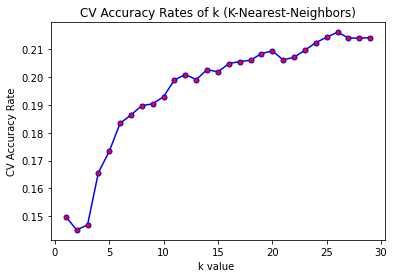

In [19]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [20]:
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index, 'accuracy = ', value)

best k =  25 accuracy =  0.2161590488088571


In [21]:
from sklearn.neighbors import KNeighborsClassifier

best_knn = KNeighborsClassifier(n_neighbors=25, metric = 'euclidean') 

best_knn.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=25)